In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
data = pd.read_csv('heartv1.csv')
data

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,female,45,2,145,195,0,1,180,1,3.0,1,0,2,-5,15.90,1
1031,male,53,0,125,210,0,1,165,0,0.8,1,1,3,2,13.20,0
1032,female,60,1,130,240,1,0,150,1,2.2,2,2,1,10,18.80,1
1033,male,67,2,155,205,0,1,140,0,1.1,0,0,2,13,16.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       1035 non-null   object 
 1   age                       1035 non-null   int64  
 2   cp                        1035 non-null   int64  
 3   resting_BP                1035 non-null   int64  
 4   chol                      1035 non-null   int64  
 5   fbs                       1035 non-null   int64  
 6   restecg                   1035 non-null   int64  
 7   thalach                   1035 non-null   int64  
 8   exang                     1035 non-null   int64  
 9   oldpeak                   1035 non-null   float64
 10  slope                     1035 non-null   int64  
 11  ca                        1035 non-null   int64  
 12  thal                      1035 non-null   int64  
 13  Max Heart Rate Reserve    1035 non-null   int64  
 14  Heart Di

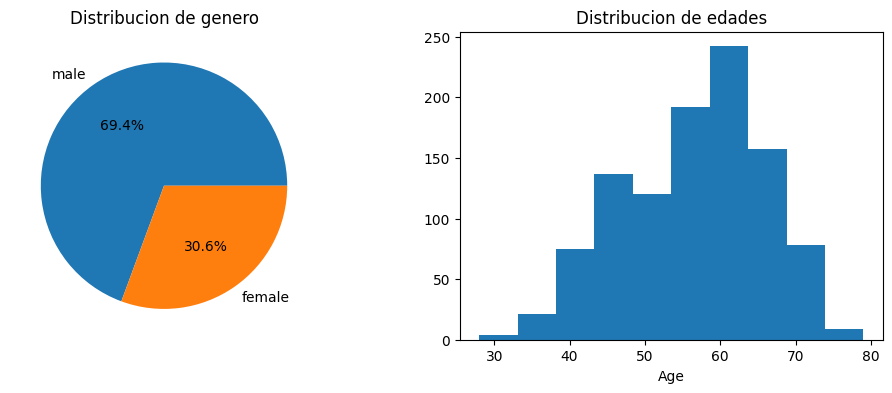

In [27]:
x = data['sex'].unique()
y = data['sex'].value_counts()
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(12,4)
ax1.pie(y,labels=x, autopct='%0.1f%%')
ax1.set_title('Distribucion de genero')
ax2.hist(data.age)
ax2.set_title('Distribucion de edades')
ax2.set_xlabel('Age')
plt.show()

In [5]:
data_female = data.loc[data['sex']=='female']
data_female

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
5,female,64,0,124,209,0,1,163,0,0.0,2,0,2,-5,10.77,1
6,female,65,1,140,195,0,1,179,0,0.0,2,2,2,-22,11.05,1
8,female,57,0,180,327,0,2,117,1,3.4,1,0,2,48,15.37,0
10,female,78,2,140,197,0,2,116,0,1.1,1,0,2,28,12.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,female,72,2,135,190,1,0,145,0,1.3,1,1,3,3,16.70,1
1028,female,49,1,120,230,1,0,170,1,2.7,2,3,1,1,14.60,1
1030,female,45,2,145,195,0,1,180,1,3.0,1,0,2,-5,15.90,1
1032,female,60,1,130,240,1,0,150,1,2.2,2,2,1,10,18.80,1


In [6]:
data_female.select_dtypes(include=['number']).corr()

,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
age,1.000000,-0.033622,0.281154,0.241578,0.125006,-0.028452,-0.402859,0.002188,0.164176,-0.070005,0.381671,0.150918,-0.069155,0.543813,-0.210156
cp,-0.033622,1.000000,-0.162200,-0.060151,0.005362,0.059798,0.123834,-0.429340,-0.284827,0.285541,-0.267075,-0.244889,-0.118076,-0.279398,0.526411
resting_BP,0.281154,-0.162200,1.000000,0.158518,0.242113,-0.026233,-0.112996,0.319510,0.394068,-0.268346,0.272272,0.206819,-0.019285,0.564857,-0.403575
chol,0.241578,-0.060151,0.158518,1.000000,0.125088,-0.271164,0.021555,0.078561,0.114637,0.125991,0.088451,0.256938,-0.144709,0.460266,-0.153267
fbs,0.125006,0.005362,0.242113,0.125088,1.000000,-0.204641,-0.150223,0.208334,0.142038,0.038941,0.297352,0.020492,0.097807,0.548830,-0.219385
restecg,-0.028452,0.059798,-0.026233,-0.271164,-0.204641,1.000000,-0.071585,0.032183,-0.086152,0.074009,-0.144764,0.012523,0.092906,-0.136108,0.039279
thalach,-0.402859,0.123834,-0.112996,0.021555,-0.150223,-0.071585,1.000000,-0.108554,-0.226582,0.327534,-0.131565,-0.158823,-0.885128,-0.268416,0.264096
exang,0.002188,-0.429340,0.319510,0.078561,0.208334,0.032183,-0.108554,1.000000,0.217570,-0.272526,0.074214,0.202633,0.114866,0.694661,-0.475050
oldpeak,0.164176,-0.284827,0.394068,0.114637,0.142038,-0.086152,-0.226582,0.217570,1.000000,-0.586180,0.468785,0.336550,0.161208,0.336073,-0.495974
slope,-0.070005,0.285541,-0.268346,0.125991,0.038941,0.074009,0.327534,-0.272526,-0.586180,1.000000,-0.204220,-0.340793,-0.320995,-0.176703,0.459475


In [11]:
#Regresion lineal multiple
yf = data_female['Heart Disease Risk Score']
xf = data_female.copy()
xf = xf.drop(['sex','cp','restecg','thalach ','oldpeak','slope','ca','thal','Max Heart Rate Reserve','Heart Disease Risk Score','target'], axis=1)
Xf = sm.add_constant(xf)
results_female1 = sm.OLS(yf,Xf).fit()
results_female1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Heart Disease Risk Score   R-squared:                       0.983
Model:                                  OLS   Adj. R-squared:                  0.982
Method:                       Least Squares   F-statistic:                     3497.
Date:                      Sat, 02 Nov 2024   Prob (F-statistic):          7.29e-271
Time:                              00:10:58   Log-Likelihood:                -82.365
No. Observations:                       317   AIC:                             176.7
Df Residuals:                           311   BIC:                             199.3
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0172      0.156     -0.110      0.912      -0.324       0.289
age            0.1007      0.002     49.349      0.000       0.097       0.105
resting_BP     0.0194      0.001     18.879      0.000       0.017       0.021
chol           0.0095      0.000     32.887      0.000       0.009       0.010
fbs            2.1251      0.053     39.811      0.000       2.020       2.230
exang          3.0739      0.044     69.343      0.000       2.987       3.161
==============================================================================
Omnibus:                      543.273   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134986.755
Skew:                           9.782   Prob(JB):                         0.00
Kurtosis:                     102.182   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Regresion lineal multiple
xf = data_female.copy()
xf = xf.drop(['sex','cp','age','fbs','chol','restecg','thalach ','oldpeak','slope','ca','thal','Max Heart Rate Reserve','Heart Disease Risk Score','target'], axis=1)
Xf = sm.add_constant(xf)
results_female2 = sm.OLS(yf,Xf).fit()
results_female2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Heart Disease Risk Score   R-squared:                       0.614
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                     249.2
Date:                      Sat, 02 Nov 2024   Prob (F-statistic):           1.52e-65
Time:                              00:12:45   Log-Likelihood:                -573.11
No. Observations:                       317   AIC:                             1152.
Df Residuals:                           314   BIC:                             1164.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9191      0.595      8.270      0.000       3.749       6.089
resting_BP     0.0466      0.005     10.315      0.000       0.038       0.055
exang          3.1555      0.204     15.467      0.000       2.754       3.557
==============================================================================
Omnibus:                       27.395   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.031
Skew:                           0.634   Prob(JB):                     1.50e-08
Kurtosis:                       4.058   Cond. No.                         968.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_female = pd.DataFrame(dict(real = yf,
                             Modelo_1 = results_female1.predict(),
                             Modelo_2 = results_female2.predict()))
df_female

,real,Modelo_1,Modelo_2
3,8.34,8.397200,10.133581
5,10.77,10.805076,10.692277
6,11.05,11.082959,11.437204
8,15.37,15.373807,16.454987
10,12.37,12.411174,11.437204
...,...,...,...
1026,16.70,13.769045,11.204414
1028,14.60,14.614633,13.661510
1030,15.90,12.239311,14.825458
1032,18.80,16.010595,14.127089


<Axes: ylabel='Proportion'>

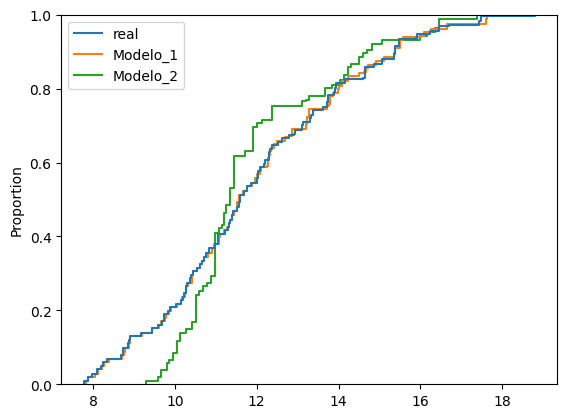

In [15]:
sns.ecdfplot(df_female) #Comparacion de modelos para predecir puntaje de riesgo de infarto

<Axes: ylabel='Density'>

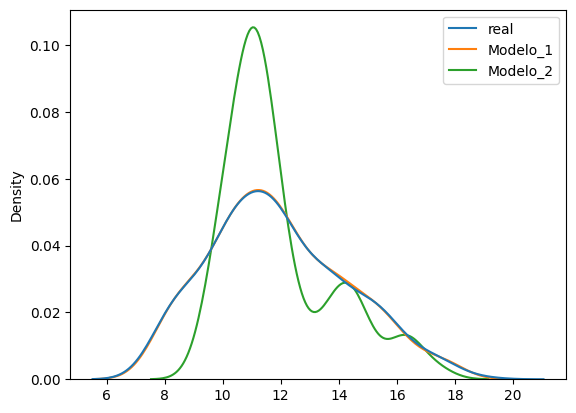

In [35]:
sns.kdeplot(df_female)

In [8]:
data_male = data.loc[data['sex']=='male']
data_male

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0
7,male,42,0,152,223,0,1,181,0,0.0,2,0,3,-1,9.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,male,65,1,150,210,0,1,160,1,2.4,2,0,2,-5,14.50,0
1027,male,58,0,140,180,0,1,130,0,0.5,0,2,2,32,11.20,0
1029,male,62,3,160,220,0,1,150,0,1.9,0,2,3,8,15.60,0
1031,male,53,0,125,210,0,1,165,0,0.8,1,1,3,2,13.20,0


In [16]:
data_male.select_dtypes(include=['number']).corr()

,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
age,1.000000,-0.090065,0.258029,0.178038,0.124286,-0.190316,-0.401833,0.139899,0.239118,-0.221510,0.244195,0.082163,0.036439,0.623026,-0.298377
cp,-0.090065,1.000000,0.139299,-0.114911,0.110707,0.033216,0.364260,-0.384978,-0.121496,0.063009,-0.140420,-0.130663,-0.360979,-0.254182,0.404916
resting_BP,0.258029,0.139299,1.000000,0.079273,0.147491,-0.178966,-0.015662,-0.046976,0.093057,-0.061074,0.036922,0.033727,-0.087618,0.299830,-0.064285
chol,0.178038,-0.114911,0.079273,1.000000,-0.030389,-0.088247,-0.067893,0.105317,0.054941,-0.099551,0.098065,0.107919,0.003267,0.337772,-0.178255
fbs,0.124286,0.110707,0.147491,-0.030389,1.000000,-0.068222,0.043741,-0.008340,-0.039488,-0.091176,0.085014,-0.075294,-0.097255,0.391142,0.043908
restecg,-0.190316,0.033216,-0.178966,-0.088247,-0.068222,1.000000,0.095106,-0.099978,-0.025842,0.076775,-0.045213,-0.014577,-0.026704,-0.205353,0.153801
thalach,-0.401833,0.364260,-0.015662,-0.067893,0.043741,0.095106,1.000000,-0.453195,-0.380951,0.414743,-0.220621,-0.073517,-0.929677,-0.468317,0.479863
exang,0.139899,-0.384978,-0.046976,0.105317,-0.008340,-0.099978,-0.453195,1.000000,0.345102,-0.246912,0.106473,0.154505,0.438414,0.732176,-0.387987
oldpeak,0.239118,-0.121496,0.093057,0.054941,-0.039488,-0.025842,-0.380951,0.345102,1.000000,-0.557613,0.126853,0.140520,0.319408,0.341566,-0.401511
slope,-0.221510,0.063009,-0.061074,-0.099551,-0.091176,0.076775,0.414743,-0.246912,-0.557613,1.000000,-0.025299,-0.024531,-0.362719,-0.329928,0.313785


In [19]:
#Regresion lineal multiple
ym = data_male['Heart Disease Risk Score']
xm = data_male.drop(['sex','cp','restecg','thalach ','oldpeak','ca','thal','Max Heart Rate Reserve','slope','target','Heart Disease Risk Score'],axis=1)
Xm = sm.add_constant(xm)
results_male1 = sm.OLS(ym,Xm).fit()
results_male1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Heart Disease Risk Score   R-squared:                       0.985
Model:                                  OLS   Adj. R-squared:                  0.985
Method:                       Least Squares   F-statistic:                     9463.
Date:                      Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                              00:26:03   Log-Likelihood:                -62.921
No. Observations:                       718   AIC:                             137.8
Df Residuals:                           712   BIC:                             165.3
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2726      0.100     -2.724      0.007      -0.469      -0.076
age            0.1008      0.001     85.139      0.000       0.098       0.103
resting_BP     0.0212      0.001     33.641      0.000       0.020       0.022
chol           0.0096      0.000     41.013      0.000       0.009       0.010
fbs            1.9643      0.028     70.540      0.000       1.910       2.019
exang          2.9713      0.021    143.093      0.000       2.931       3.012
==============================================================================
Omnibus:                     1428.277   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1531790.776
Skew:                          14.757   Prob(JB):                         0.00
Kurtosis:                     227.345   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Regresion lineal multiple
ym = data_male['Heart Disease Risk Score']
xm = data_male.drop(['sex','cp','resting_BP','fbs','restecg','thalach ','oldpeak','ca','thal','Max Heart Rate Reserve','slope','target','Heart Disease Risk Score'],axis=1)
Xm = sm.add_constant(xm)
results_male2 = sm.OLS(ym,Xm).fit()
results_male2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Heart Disease Risk Score   R-squared:                       0.844
Model:                                  OLS   Adj. R-squared:                  0.843
Method:                       Least Squares   F-statistic:                     1287.
Date:                      Sat, 02 Nov 2024   Prob (F-statistic):          1.84e-287
Time:                              00:28:01   Log-Likelihood:                -907.91
No. Observations:                       718   AIC:                             1824.
Df Residuals:                           714   BIC:                             1842.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7792      0.250      7.116      0.000       1.288       2.270
age            0.1220      0.004     33.084      0.000       0.115       0.129
chol           0.0091      0.001     11.999      0.000       0.008       0.011
exang          2.8758      0.067     42.926      0.000       2.744       3.007
==============================================================================
Omnibus:                      208.056   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.043
Skew:                           1.602   Prob(JB):                     1.88e-98
Kurtosis:                       5.185   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_male = pd.DataFrame(dict(real = ym,
                           Modelo_1 = results_male1.predict(),
                           Modelo_2 = results_male2.predict()))
df_male

,real,Modelo_1,Modelo_2
0,11.44,11.477187,12.020414
1,13.51,13.518332,13.496318
2,9.46,9.487910,9.899463
4,13.43,13.418428,13.201673
7,9.27,9.326535,8.932832
...,...,...,...
1025,14.50,14.448063,14.495446
1027,11.20,10.270625,10.492689
1029,15.60,11.482521,11.344857
1031,13.20,9.738154,10.156076


<Axes: ylabel='Proportion'>

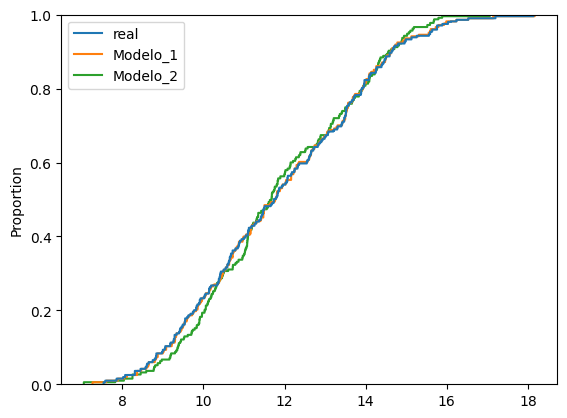

In [23]:
sns.ecdfplot(df_male) #Comparacion de modelos para predecir puntaje de riesgo de infarto

<Axes: ylabel='Density'>

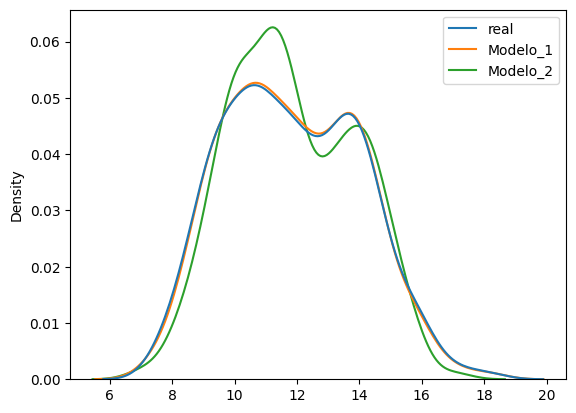

In [34]:
sns.kdeplot(df_male)

In [24]:
data_T = data.copy()
data_T

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,female,45,2,145,195,0,1,180,1,3.0,1,0,2,-5,15.90,1
1031,male,53,0,125,210,0,1,165,0,0.8,1,1,3,2,13.20,0
1032,female,60,1,130,240,1,0,150,1,2.2,2,2,1,10,18.80,1
1033,male,67,2,155,205,0,1,140,0,1.1,0,0,2,13,16.10,0


In [28]:
data_T['sex'] = data_T['sex'].map({'male':0,'female':1})
data_T

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,0,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,0,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,0,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,1,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,0,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1,45,2,145,195,0,1,180,1,3.0,1,0,2,-5,15.90,1
1031,0,53,0,125,210,0,1,165,0,0.8,1,1,3,2,13.20,0
1032,1,60,1,130,240,1,0,150,1,2.2,2,2,1,10,18.80,1
1033,0,67,2,155,205,0,1,140,0,1.1,0,0,2,13,16.10,0


In [29]:
data_T.corr()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
sex,1.000000,0.101454,0.041674,0.073992,0.193138,-0.016285,0.049876,0.053461,-0.129367,-0.076638,0.030477,-0.103565,-0.202308,-0.101730,0.012570,0.286696
age,0.101454,1.000000,-0.068400,0.271202,0.215806,0.122104,-0.129768,-0.391910,0.084982,0.206170,-0.171385,0.268296,0.074185,-0.003449,0.594408,-0.229878
cp,0.041674,-0.068400,1.000000,0.044269,-0.081857,0.080285,0.043257,0.304779,-0.398395,-0.170205,0.125265,-0.176019,-0.159618,-0.301719,-0.260312,0.430652
resting_BP,0.073992,0.271202,0.044269,1.000000,0.125056,0.176653,-0.119098,-0.040439,0.058097,0.186793,-0.125547,0.099411,0.060503,-0.073050,0.395669,-0.142581
chol,0.193138,0.215806,-0.081857,0.125056,1.000000,0.025693,-0.150233,-0.023790,0.065025,0.060115,-0.007120,0.069053,0.100234,-0.065901,0.379719,-0.098822
fbs,-0.016285,0.122104,0.080285,0.176653,0.025693,1.000000,-0.112160,-0.007944,0.052781,0.014919,-0.054576,0.142152,-0.048623,-0.044080,0.440243,-0.032605
restecg,0.049876,-0.129768,0.043257,-0.119098,-0.150233,-0.112160,1.000000,0.049330,-0.065811,-0.048725,0.077093,-0.078425,-0.017561,0.002556,-0.180494,0.127679
thalach,0.053461,-0.391910,0.304779,-0.040439,-0.023790,-0.007944,0.049330,1.000000,-0.371489,-0.342091,0.392832,-0.203583,-0.099321,-0.918573,-0.406557,0.422738
exang,-0.129367,0.084982,-0.398395,0.058097,0.065025,0.052781,-0.065811,-0.371489,1.000000,0.316049,-0.255407,0.110441,0.185289,0.366833,0.709913,-0.427254
oldpeak,-0.076638,0.206170,-0.170205,0.186793,0.060115,0.014919,-0.048725,-0.342091,0.316049,1.000000,-0.566109,0.224005,0.194529,0.282586,0.337312,-0.430443


In [31]:
#Regresion logistica para predecir problemas del corazon o no
y = data_T['target']
x = data_T.drop(['target'],axis=1)
X = sm.add_constant(x)
results_logit1 = sm.Logit(y,X).fit()
results_logit1.summary() #0.4933

Optimization terminated successfully.
         Current function value: 0.351029
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1035
Model:                          Logit   Df Residuals:                     1019
Method:                           MLE   Df Model:                           15
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.4933
Time:                        00:44:19   Log-Likelihood:                -363.31
converged:                       True   LL-Null:                       -717.06
Covariance Type:            nonrobust   LLR p-value:                4.729e-141
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      159.0697    136.955      1.161      0.245    -109.357     427.497
sex                          1.9556      0.255      7.672      0.000       1.456       2.455
age                         -0.6668      0.584     -1.143      0.253      -1.810       0.477
cp                           0.8569      0.100      8.585      0.000       0.661       1.053
resting_BP                  -0.0096      0.011     -0.896      0.370      -0.031       0.011
chol                        -0.0009      0.005     -0.179      0.858      -0.010       0.009
fbs                          0.9826      0.930      1.057      0.290      -0.839       2.804
restecg                      0.3749      0.188      1.997      0.046       0.007       0.743
thalach                     -0.6839      0.618     -1.107      0.268      -1.894       0.526
exang                        0.5453      1.329      0.410      0.682      -2.060       3.151
oldpeak                     -0.5481      0.114     -4.818      0.000      -0.771      -0.325
slope                        0.5680      0.184      3.088      0.002       0.207       0.929
ca                          -0.7372      0.102     -7.230      0.000      -0.937      -0.537
thal                        -0.8818      0.154     -5.716      0.000      -1.184      -0.579
Max Heart Rate Reserve      -0.7082      0.617     -1.148      0.251      -1.917       0.501
Heart Disease Risk Score    -0.5048      0.442     -1.142      0.253      -1.371       0.361
============================================================================================
"""

In [33]:
y = data_T['target']
x = data_T.drop(['target','age','resting_BP','chol','fbs','thalach ','exang'],axis=1)
X = sm.add_constant(x)
results_logit2 = sm.Logit(y,X).fit()
results_logit2.summary()

Optimization terminated successfully.
         Current function value: 0.358227
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1035
Model:                          Logit   Df Residuals:                     1025
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.4829
Time:                        00:44:43   Log-Likelihood:                -370.77
converged:                       True   LL-Null:                       -717.06
Covariance Type:            nonrobust   LLR p-value:                2.722e-143
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.1239      0.783      6.542      0.000       3.589       6.659
sex                          1.7875      0.235      7.619      0.000       1.328       2.247
cp                           0.8684      0.095      9.131      0.000       0.682       1.055
restecg                      0.4187      0.180      2.325      0.020       0.066       0.772
oldpeak                     -0.5648      0.110     -5.143      0.000      -0.780      -0.350
slope                        0.5273      0.181      2.920      0.004       0.173       0.881
ca                          -0.6813      0.098     -6.945      0.000      -0.874      -0.489
thal                        -0.9747      0.147     -6.625      0.000      -1.263      -0.686
Max Heart Rate Reserve      -0.0223      0.005     -4.257      0.000      -0.033      -0.012
Heart Disease Risk Score    -0.3197      0.048     -6.665      0.000      -0.414      -0.226
============================================================================================
"""

In [39]:
y = data_T['target']
x = data_T.drop(['target','age','resting_BP','chol','fbs','thalach ','exang','Max Heart Rate Reserve','Heart Disease Risk Score','cp'],axis=1)
X = sm.add_constant(x)
results_logit3 = sm.Logit(y,X).fit()
results_logit3.summary()

Optimization terminated successfully.
         Current function value: 0.462463
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1035
Model:                          Logit   Df Residuals:                     1028
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                  0.3325
Time:                        00:57:03   Log-Likelihood:                -478.65
converged:                       True   LL-Null:                       -717.06
Covariance Type:            nonrobust   LLR p-value:                8.294e-100
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8752      0.417      4.497      0.000       1.058       2.693
sex            1.1758      0.186      6.317      0.000       0.811       1.541
restecg        0.4067      0.153      2.651      0.008       0.106       0.707
oldpeak       -0.6492      0.098     -6.621      0.000      -0.841      -0.457
slope          0.7156      0.155      4.617      0.000       0.412       1.019
ca            -0.7453      0.087     -8.587      0.000      -0.915      -0.575
thal          -0.9426      0.130     -7.243      0.000      -1.198      -0.688
==============================================================================
"""

In [40]:
#Efectividad modelos
df_log = pd.DataFrame(dict(real=y,
                          Model_1 = results_logit1.predict().round(),
                          Model_2 = results_logit2.predict().round(),
                          Model_3 = results_logit3.predict().round()))
df_log

,real,Model_1,Model_2,Model_3
0,0,0.0,0.0,0.0
1,1,1.0,1.0,1.0
2,1,1.0,1.0,1.0
3,1,1.0,1.0,1.0
4,0,0.0,0.0,0.0
...,...,...,...,...
1030,1,1.0,1.0,1.0
1031,0,0.0,0.0,0.0
1032,1,1.0,0.0,1.0
1033,0,0.0,0.0,0.0


In [41]:
values_reales = df_log.real.value_counts()
values_M1 = df_log.Model_1.value_counts()
values_M2 = df_log.Model_2.value_counts()
values_M3 = df_log.Model_3.value_counts()

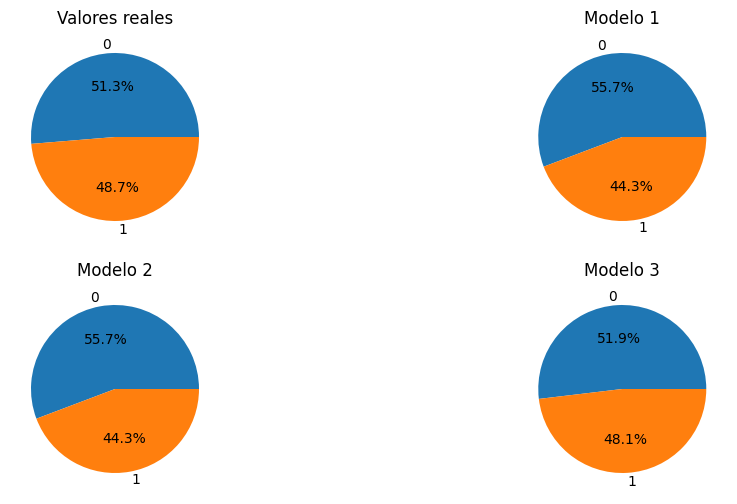

In [43]:
#Grafica de los resultados de las regresiones logisticas
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12,6)

axs[0,0].pie(values_reales,labels=df_log.real.unique(),autopct='%0.1f%%')
axs[0,0].set_title('Valores reales')

axs[0,1].pie(values_M1,labels=df_log.real.unique(),autopct='%0.1f%%')
axs[0,1].set_title('Modelo 1')

axs[1,0].pie(values_M2,labels=df_log.real.unique(),autopct='%0.1f%%')
axs[1,0].set_title('Modelo 2')

axs[1,1].pie(values_M3,labels=df_log.real.unique(),autopct='%0.1f%%')
axs[1,1].set_title('Modelo 3')

plt.show()